## **다중선형회귀**

In [5]:
import tensorflow as tf

data = [[2, 0, 81],[4, 4, 93], [6, 2 ,91], [8, 3, 97]]

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]

y_data = [y_row[2] for y_row in data]

In [6]:
x1, x2

([2, 4, 6, 8], [0, 4, 2, 3])

In [10]:
# 기울기 a1, a2와 절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0~10 사이이며, y 절편은 0~100사이에서 변하게 한다. 
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

In [11]:
# y에 대한 방정식 y = a1x1 + a2x2 + b 
y = a1 * x1 + a2 * x2 + b

In [12]:
# 텐서플로 RMSE 함수 
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

In [14]:
# 학습률 값
learning_rate = 0.1

In [15]:
# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

In [21]:
# 텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2001번 실행(0번 째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent)
        # 100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a1 = %.4f, y 절편 b = %.4f" % (step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))

Epoch: 0, RMSE = 132.9009, 기울기 a1 = 7.5408, 기울기 a1 = 7.8256, y 절편 b = 80.5917
Epoch: 100, RMSE = 30.0484, 기울기 a1 = -10.7712, 기울기 a1 = -1.6154, y 절편 b = 74.2312
Epoch: 200, RMSE = 28.3958, 기울기 a1 = -9.8457, 기울기 a1 = -2.2043, y 절편 b = 70.3179
Epoch: 300, RMSE = 26.7807, 기울기 a1 = -9.0398, 기울기 a1 = -2.5238, y 절편 b = 66.3943
Epoch: 400, RMSE = 25.1826, 기울기 a1 = -8.3173, 기울기 a1 = -2.6574, y 절편 b = 62.4650
Epoch: 500, RMSE = 23.5918, 기울기 a1 = -7.6509, 기울기 a1 = -2.6659, y 절편 b = 58.5326
Epoch: 600, RMSE = 22.0038, 기울기 a1 = -7.0215, 기울기 a1 = -2.5925, y 절편 b = 54.5985
Epoch: 700, RMSE = 20.4170, 기울기 a1 = -6.4156, 기울기 a1 = -2.4669, y 절편 b = 50.6634
Epoch: 800, RMSE = 18.8306, 기울기 a1 = -5.8240, 기울기 a1 = -2.3093, y 절편 b = 46.7277
Epoch: 900, RMSE = 17.2443, 기울기 a1 = -5.2411, 기울기 a1 = -2.1328, y 절편 b = 42.7917
Epoch: 1000, RMSE = 15.6580, 기울기 a1 = -4.6629, 기울기 a1 = -1.9456, y 절편 b = 38.8555
Epoch: 1100, RMSE = 14.0717, 기울기 a1 = -4.0874, 기울기 a1 = -1.7527, y 절편 b = 34.9193
Epoch: 1200, RMSE = 12.4855,

## **참 거짓 판단 장치 : 로지스틱 회귀**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [26]:
x = np.linspace(-5, 5, 1001)

In [27]:
sig_y = sigmoid(x)

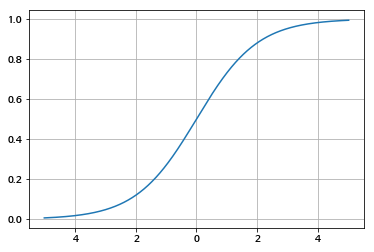

In [32]:
plt.plot(x, sig_y)
plt.grid()
plt.show()

In [38]:
def sig5(x):
    return 1/(1+np.exp(-5*x))

def sig05(x):
    return 1/(1+np.exp(-0.5*x))

In [41]:
sig_5y = sig5(x)
sig_05y = sig05(x)

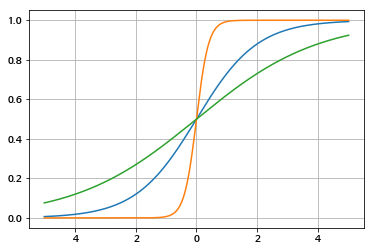

In [42]:
plt.plot(x, sig_y, x, sig_5y, x, sig_05y)
plt.grid()
plt.show()

In [44]:
def sig_shift(x, b):
    return 1 / (1 + np.exp(-(x-b)))

In [48]:
sig_shift2y = sig_shift(x, 2)
sig_shift_2y = sig_shift(x, -2)

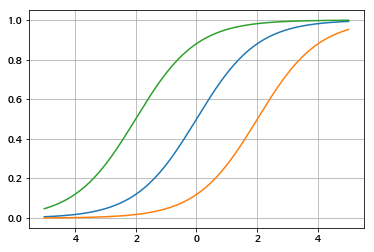

In [51]:
plt.plot(x, sig_y, x, sig_shift2y, x, sig_shift_2y)
plt.grid()
plt.show()

In [58]:
# 시그모이드 함수의 미분 
def derivative_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

In [59]:
derivative_y = derivative_sigmoid(x)

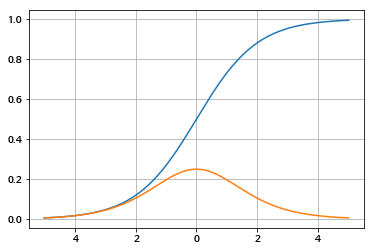

In [68]:
plt.plot(x, sig_y, x, derivative_y)
plt.grid()
plt.show()

In [88]:
import tensorflow as tf
import numpy as np

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))



In [89]:
y = 1/(1 + np.e**(a * x_data + b))

In [90]:
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 - np.array(y_data)) * tf.log(1 - y))

In [91]:
learning_rate = 0.5

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [92]:
# 텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_decent)
        # 6000번마다 결과 출력
        if i % 6000 == 0:
            print("Epoch: %.f, loss = %.4f, 기울기 a = %.4f, y 절편 = %.4f" % (i, sess.run(loss),sess.run(a),sess.run(b)))

Epoch: 0, loss = 1.2676, 기울기 a = 0.1849, y 절편 = -0.4334
Epoch: 6000, loss = 0.0152, 기울기 a = -2.9211, y 절편 = 20.2982
Epoch: 12000, loss = 0.0081, 기울기 a = -3.5637, y 절편 = 24.8010
Epoch: 18000, loss = 0.0055, 기울기 a = -3.9557, y 절편 = 27.5463
Epoch: 24000, loss = 0.0041, 기울기 a = -4.2380, y 절편 = 29.5231
Epoch: 30000, loss = 0.0033, 기울기 a = -4.4586, y 절편 = 31.0675
Epoch: 36000, loss = 0.0028, 기울기 a = -4.6396, y 절편 = 32.3346
Epoch: 42000, loss = 0.0024, 기울기 a = -4.7930, y 절편 = 33.4086
Epoch: 48000, loss = 0.0021, 기울기 a = -4.9261, y 절편 = 34.3406
Epoch: 54000, loss = 0.0019, 기울기 a = -5.0436, y 절편 = 35.1636
Epoch: 60000, loss = 0.0017, 기울기 a = -5.1489, y 절편 = 35.9005


## **여러 입력 값을 갖는 로지스틱 회귀**

In [93]:
#-*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np

# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [94]:
# x,y의 데이터 값
x_data = np.array([[2, 3],[4, 3],[6, 4],[8, 6],[10, 7],[12, 8],[14, 9]])
y_data = np.array([0, 0, 0, 1, 1, 1,1]).reshape(7, 1)

print(x_data)
print(y_data)

[[ 2  3]
 [ 4  3]
 [ 6  4]
 [ 8  6]
 [10  7]
 [12  8]
 [14  9]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [95]:
# 입력 값을 플래이스 홀더에 저장
X = tf.placeholder(tf.float64, shape=[None, 2])
Y = tf.placeholder(tf.float64, shape=[None, 1])

In [96]:
# 기울기 a와 bias b의 값을 임의로 정함.
a = tf.Variable(tf.random_uniform([2,1], dtype=tf.float64)) # [2,1] 의미: 들어오는 값은 2개, 나가는 값은 1개
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))

In [98]:
# y 시그모이드 함수의 방정식을 세움
# y = sig(a1x1 + a2x2 + y)

y = tf.sigmoid(tf.matmul(X, a) + b)  # matmul 행렬곱을 이용해 a1x1 + a2x2를 생성 

In [99]:
# 오차를 구하는 함수
loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y))

In [100]:
# 학습률 값
learning_rate=0.1

In [101]:
# 오차를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [102]:
predicted = tf.cast(y > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

In [103]:
# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(3001):
        a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], feed_dict={X: x_data, Y: y_data})
        if (i + 1) % 300 == 0:
            print("step=%d, a1=%.4f, a2=%.4f, b=%.4f, loss=%.4f" % (i + 1, a_[0], a_[1], b_, loss_))

step=300, a1=0.7716, a2=-0.4759, b=-2.5215, loss=0.2612
step=600, a1=0.7846, a2=-0.2257, b=-3.9715, loss=0.1878
step=900, a1=0.7039, a2=0.0864, b=-5.0215, loss=0.1473
step=1200, a1=0.6070, a2=0.3815, b=-5.8535, loss=0.1209
step=1500, a1=0.5132, a2=0.6463, b=-6.5445, loss=0.1023
step=1800, a1=0.4275, a2=0.8810, b=-7.1360, loss=0.0885
step=2100, a1=0.3509, a2=1.0889, b=-7.6534, loss=0.0779
step=2400, a1=0.2829, a2=1.2739, b=-8.1133, loss=0.0696
step=2700, a1=0.2223, a2=1.4395, b=-8.5274, loss=0.0628
step=3000, a1=0.1683, a2=1.5889, b=-8.9039, loss=0.0573
